# Factors Affecting Used Car Prices

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("vehicles.csv")

In [3]:
# Explore the data
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df.shape

(426880, 26)

In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [8]:
df.describe(include="object")

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12


* The dataset consists of 426,880 data points across 26 different features.
* For numeric vaiables, we can see outlier issues in the columns "price"(3.736929e+09) and "odometer"(1.000000e+07) from the max value. Also, the min value in the column "year" shows unusually low value like 1900 which indicates outliers.
* For categorical variables, the columns such as "url", "image_url", "description", "posting_date" etc., have a large number of unique values, which provide only less information. Also, the "VIN"(Vehicle Identification Number) is supposed to have unique value but it has 261 repeated entry, which is unusual.

In [9]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

* The county column is full of null values. So, we can drop this entire column.

In [10]:
df.drop(columns="county", inplace=True)

* We need to handle missing values and anomalies in other columns also before the analysis.

In [11]:
num_col = list(df.select_dtypes(include=["int64", "float64"]).columns)
cat_col = list(df.select_dtypes(include="object").columns)

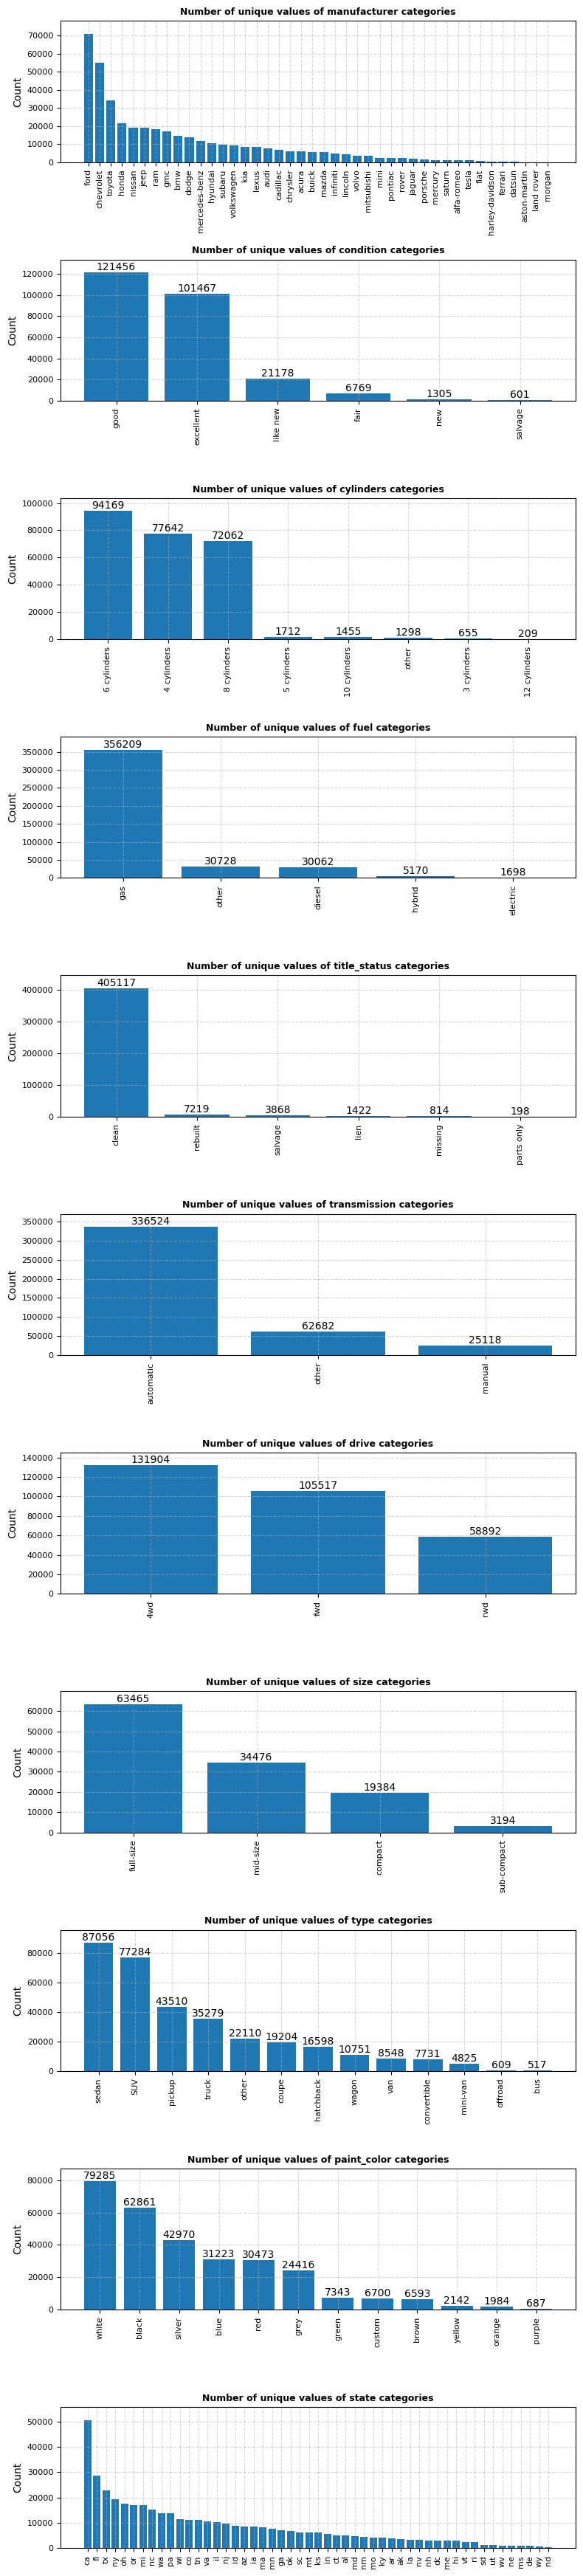

In [12]:
fig, ax = plt.subplots(11, 1, figsize=[8, 35])
index = 0
for column in cat_col:
    if df[column].nunique() < 100:
        # Bar plot:
        bars = ax[index].bar(x=df[column].value_counts().index, height=df[column].value_counts())
        
        if df[column].nunique() < 15:
             # Numeric label above each bar (only if few labels)
            ax[index].bar_label(bars)

        # Rotation of axis labels for better visuals
        ax[index].tick_params(axis='x', rotation=90, labelsize= 8)
        ax[index].tick_params(axis='y', labelsize= 8)
        ax[index].set_ylabel('Count')
        
        # Set the subplot title
        ax[index].set_title(f"Number of unique values of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
        # Add a grid to the subplot
        ax[index].grid(linestyle="dashed", alpha=0.5)

        ax[index].margins(y=0.1)
        
        # Increment the subplot index
        index += 1

plt.tight_layout()
plt.show()

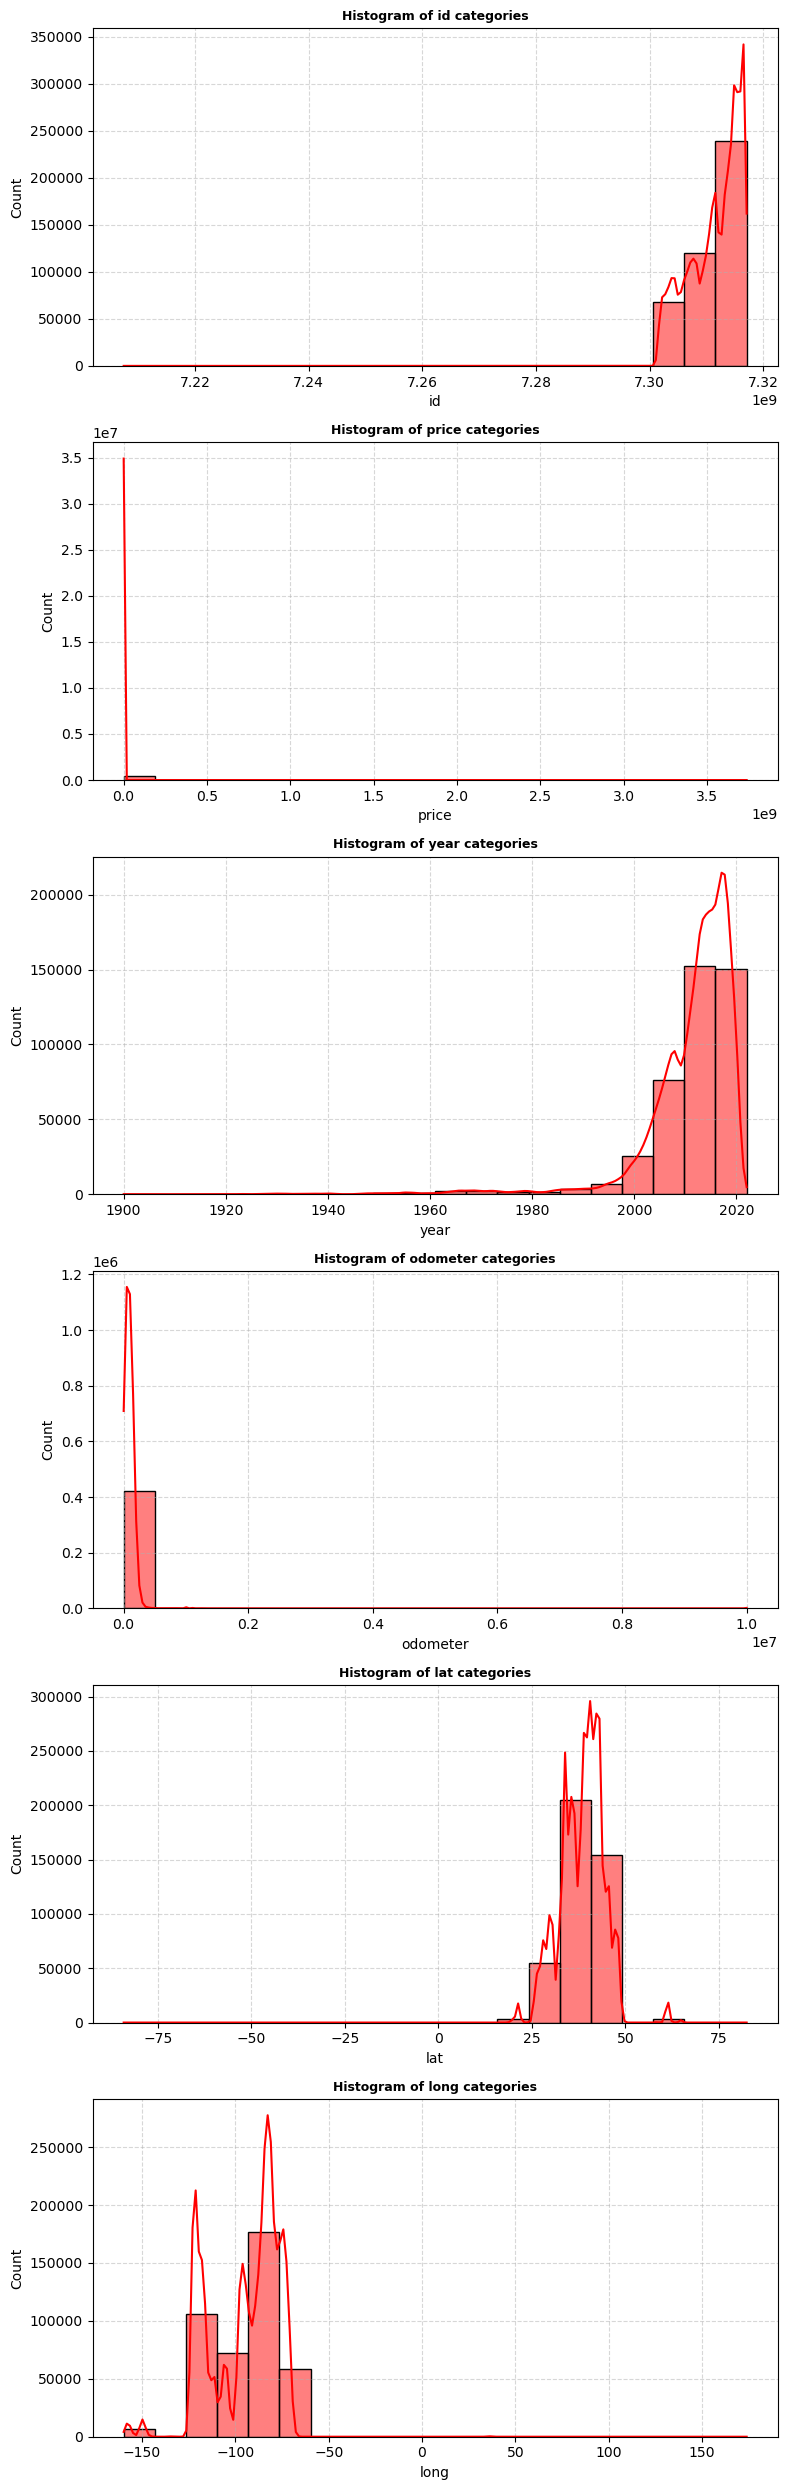

In [13]:
fig, ax = plt.subplots(6, 1, figsize=[8, 25])
index = 0
for index, column in enumerate(num_col):
    # Histplot:
    sns.histplot(ax=ax[index], x=df[column], bins=20, kde=True, color='red')

    # Set the subplot title
    ax[index].set_title(f"Histogram of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
    # Add a grid to the subplot
    ax[index].grid(linestyle="dashed", alpha=0.5)
    
    # Increment the subplot index
    index += 1
    
plt.tight_layout()
plt.show()

* The anomaly distribution is observable from the bar plots of categorical features and the histograms of numerical features.

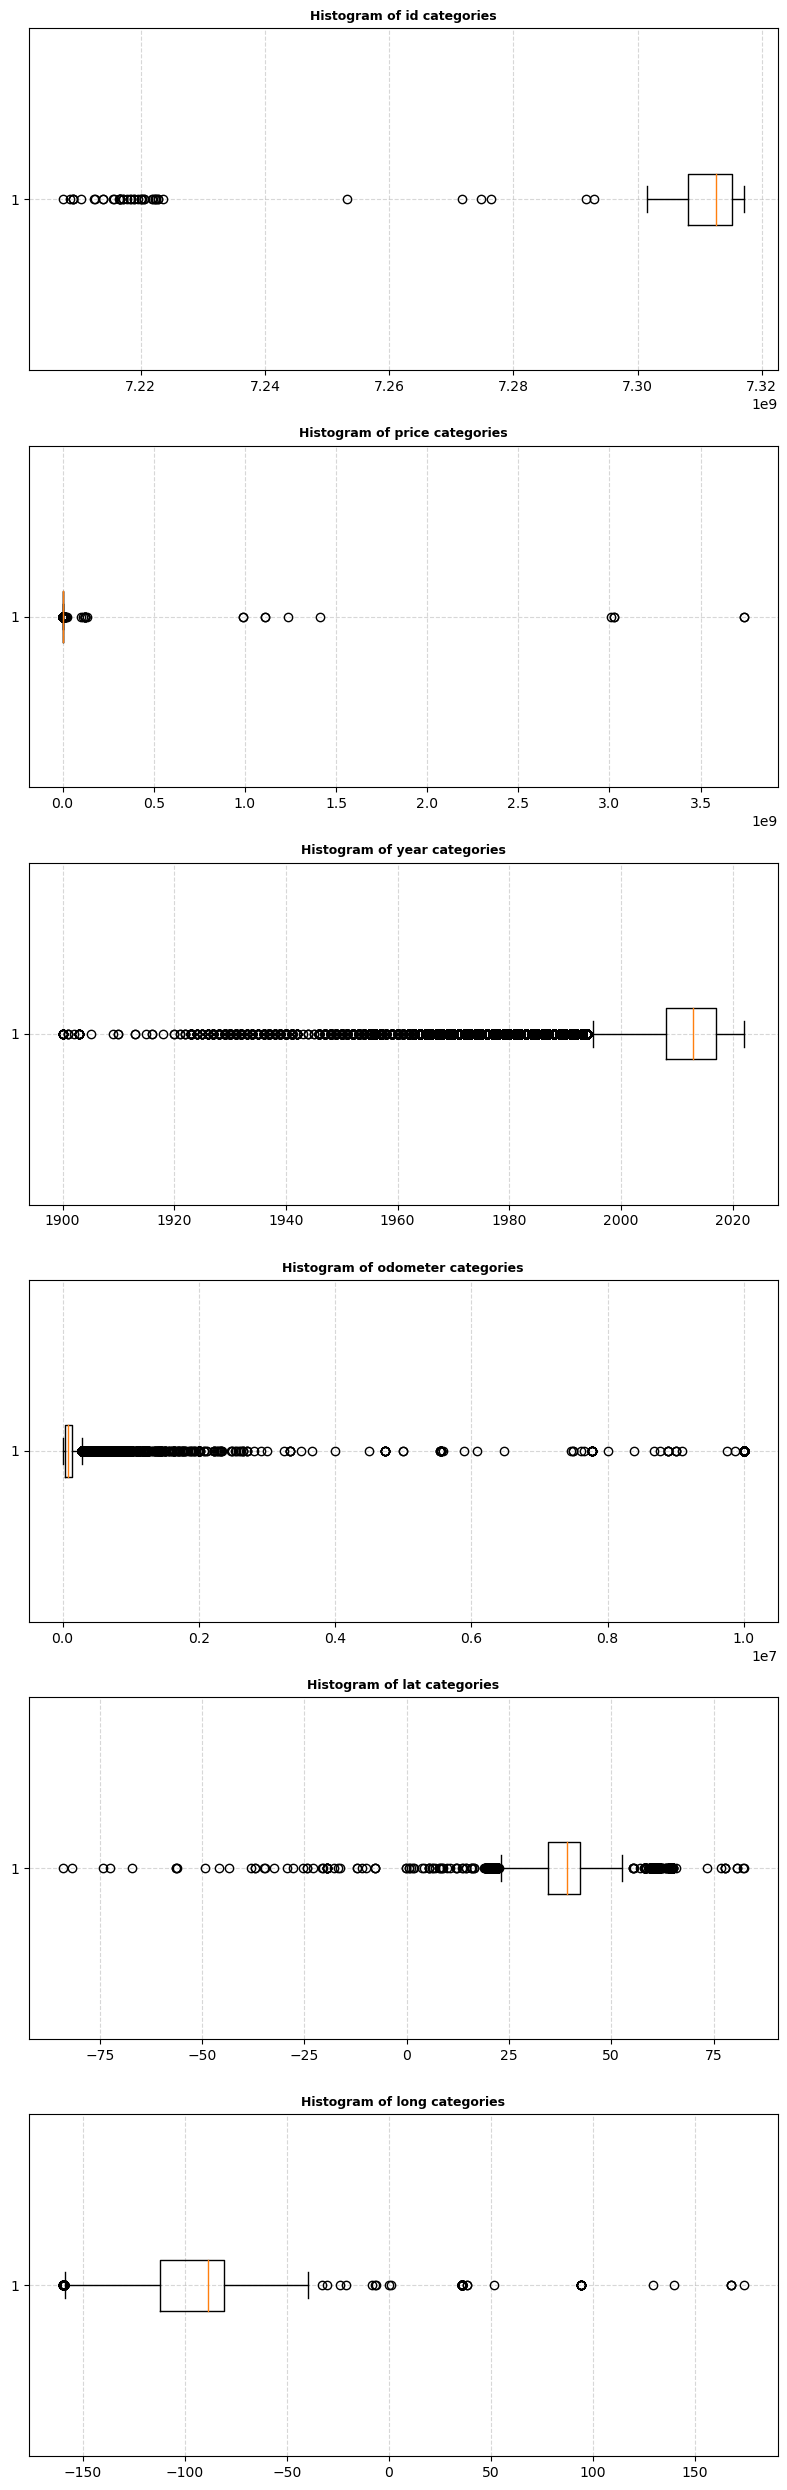

In [14]:
fig, ax = plt.subplots(6, 1, figsize=[8, 25])
index = 0
for column in num_col:
    # Histplot:
    ax[index].boxplot(df[column].dropna(), vert=False)

    # Set the subplot title
    ax[index].set_title(f"Histogram of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
    # Add a grid to the subplot
    ax[index].grid(linestyle="dashed", alpha=0.5)

    # Increment the subplot index
    index += 1

plt.tight_layout()
plt.show()

* The outlier distribution can be viewed from the box plots.

### Data Cleaning

* The columns that have no relevant information can be removed.

In [15]:
df.drop(columns=["url", "region_url", "image_url"], inplace=True)

In [16]:
df["condition"].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [17]:
df["title_status"].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

* As we observe, we get to know that the vehicles whose condition is salvage and the title_status is not entirely clean are less likely to be sold. So, we can remove those entries from those columns.

In [18]:
salvage_cars = df[df["condition"] == "salvage"].index
unclean_cars = df[df["title_status"] != "clean"].index
df.drop(index=salvage_cars, axis=0, inplace=True, errors="ignore")
df.drop(index=unclean_cars, axis=0, inplace=True, errors="ignore")

* The price column is the target column. The anomalies and outliers in this column is to be treated before further analysis.
* We take the data points of price within a certain range only since there are really extreme values.

In [19]:
min_price = df[df["price"] < 10].index
max_price = df[df["price"] > 1000000].index
df.drop(index=min_price, axis=0, errors="ignore", inplace=True)
df.drop(index=max_price, axis=0, errors="ignore", inplace=True)

* The extreme points are now removed.
* The price has high dependance in the year of manufacturing. So, we perform IQR method of outlier removal after grouping the data on the basis of year.

In [20]:
for year in sorted(df["year"].unique()):
    q1 = df[df["year"] == year]["price"].quantile(0.25)
    q3 = df[df["year"] == year]["price"].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1*5*IQR
    upper_limit = q3 + 1*5*IQR
    lower_indexes = df[(df["year"] == year) & (df["price"] < lower_limit)].index
    upper_indexes = df[(df["year"] == year) & (df["price"] > upper_limit)].index
    df.drop(index=lower_indexes, axis=0, errors="ignore", inplace=True)
    df.drop(index=upper_indexes, axis=0, errors="ignore", inplace=True)

* In the case of odometer, it also has extreme points. First, we remove them before appying IQR method.

In [21]:
low_odometer = df[(df["odometer"] < 500) & (df["condition"] != "new")].index
high_odometer = df[df["odometer"] > 300000].index
df.drop(index=low_odometer, axis=0, errors="ignore", inplace=True)
df.drop(index=high_odometer, axis=0, errors="ignore", inplace=True)

* Now that the extreeme values are removed, we perform the IQR method for outlier removal but using year as a moving criteria.

In [22]:
for year in sorted(df["year"].unique()):
    q1 = df[df["year"] == year]["odometer"].quantile(0.25)
    q3 = df[df["year"] == year]["odometer"].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1*5*IQR
    upper_limit = q3 + 1*5*IQR
    lower_indexes = df[(df["year"] == year) & (df["odometer"] < lower_limit)].index
    upper_indexes = df[(df["year"] == year) & (df["odometer"] > upper_limit)].index
    df.drop(index=lower_indexes, axis=0, errors="ignore", inplace=True)
    df.drop(index=upper_indexes, axis=0, errors="ignore", inplace=True)

* Now, we remove the outlier values in the year column.

In [23]:
filtered_years = df[(df['year'] < 1950) | (df['year'] > 2015)]
filtered_years['year'].value_counts().sort_index()

1900.0        3
1905.0        1
1915.0        1
1916.0        1
1918.0        1
1920.0        2
1921.0        1
1922.0        2
1923.0       25
1924.0        4
1925.0        4
1926.0        7
1927.0       18
1928.0       27
1929.0       40
1930.0       40
1931.0       44
1932.0       38
1933.0       21
1934.0       28
1935.0       15
1936.0       28
1937.0       58
1938.0       32
1939.0       38
1940.0       55
1941.0       51
1942.0       10
1943.0        1
1944.0        2
1946.0       43
1947.0       48
1948.0       64
1949.0       58
2016.0    25354
2017.0    30183
2018.0    30719
2019.0    21607
2020.0    16423
2021.0      980
2022.0       36
Name: year, dtype: int64

* We can see the production of cars started to increase by 1927 only. So, we take this as the lower limit.
* There are only a dew data points in the year of 2022. We need to remove it. So, we take 2021 as our upper limit.

In [24]:
low_year = df[df["year"] < 1927].index
high_year = df[df["year"] > 2021].index
df.drop(index=low_year, axis=0, errors="ignore", inplace=True)
df.drop(index=high_year, axis=0, errors="ignore", inplace=True)

* Now, we have to handle the duplicate data.
* We have seen the repeated value in the VIN is not acceptable. So, we have to deal with it.
* Using the manufacturer, model, price, year, and VIN as reference values, we will proceed to remove all duplicates

In [25]:
df.drop_duplicates(subset=["price", "year", "manufacturer", "model", "VIN"], keep="first", inplace=True)

In [26]:
df.isna().sum() / df.shape[0] * 100

id               0.000000
region           0.000000
price            0.000000
year             0.178794
manufacturer     3.895797
model            1.329403
condition       39.357748
cylinders       35.046607
fuel             0.516795
odometer         0.541906
title_status     0.000000
transmission     0.380188
VIN             48.324059
drive           26.617180
size            63.726948
type            24.220539
paint_color     27.586986
description      0.001004
state            0.000000
lat              0.530355
long             0.530355
posting_date     0.000000
dtype: float64

* Let our cleaning threshold be 40%. We remove all the columns with more null values than the threshold. Also, the title_status only has one value "clean", so it will not provide much information. That is, we remove the columns VIN, size, and title_status.

In [27]:
df.drop(columns=["VIN", "size", "title_status"], inplace=True)

* Now, we remove all other null values at once.

In [28]:
df.dropna(inplace=True)

In [29]:
df.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [30]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [31]:
df.shape

(66594, 19)

* When all the null values are eliminated, the dataset is reduced to 66594 data entries across 19 features.

### Feature analysis for numerical features

In [32]:
df.corr()

,id,price,year,odometer,lat,long
id,1.000000,-0.037580,-0.006958,0.031053,-0.044630,-0.138338
price,-0.037580,1.000000,0.261248,-0.514653,-0.008560,-0.103815
year,-0.006958,0.261248,1.000000,-0.163547,-0.001907,0.008183
odometer,0.031053,-0.514653,-0.163547,1.000000,0.009823,0.025454
lat,-0.044630,-0.008560,-0.001907,0.009823,1.000000,-0.017411
long,-0.138338,-0.103815,0.008183,0.025454,-0.017411,1.000000


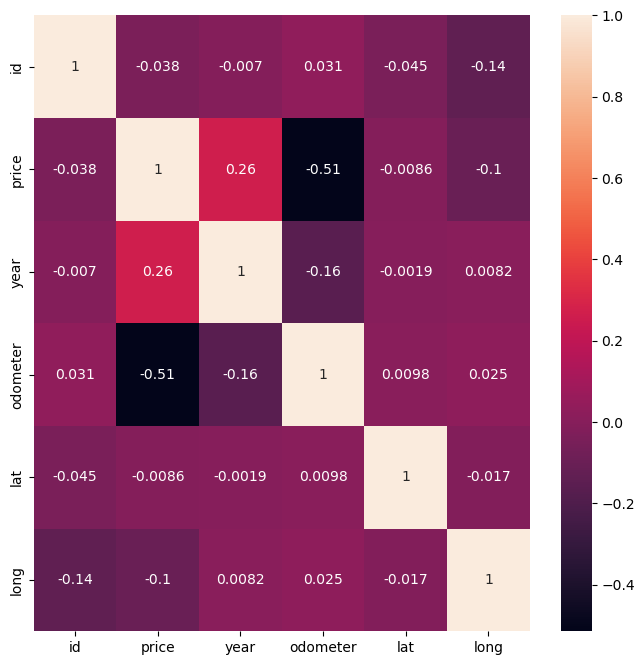

In [33]:
plt.figure(figsize =(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

* It is clear from the correlation values and heatmap, the odometer and year have high correlation with the price. That means, these two features are important to the price.
* The odometer has negative correlation with the price. That means, as the odometer values increases the price of the car drops.
* In the case of year, it is a positive correlation. The price of the car increases as the car is of newest model(year of manufacture is higher).
* Let us visualize their relations explicitly for more information.

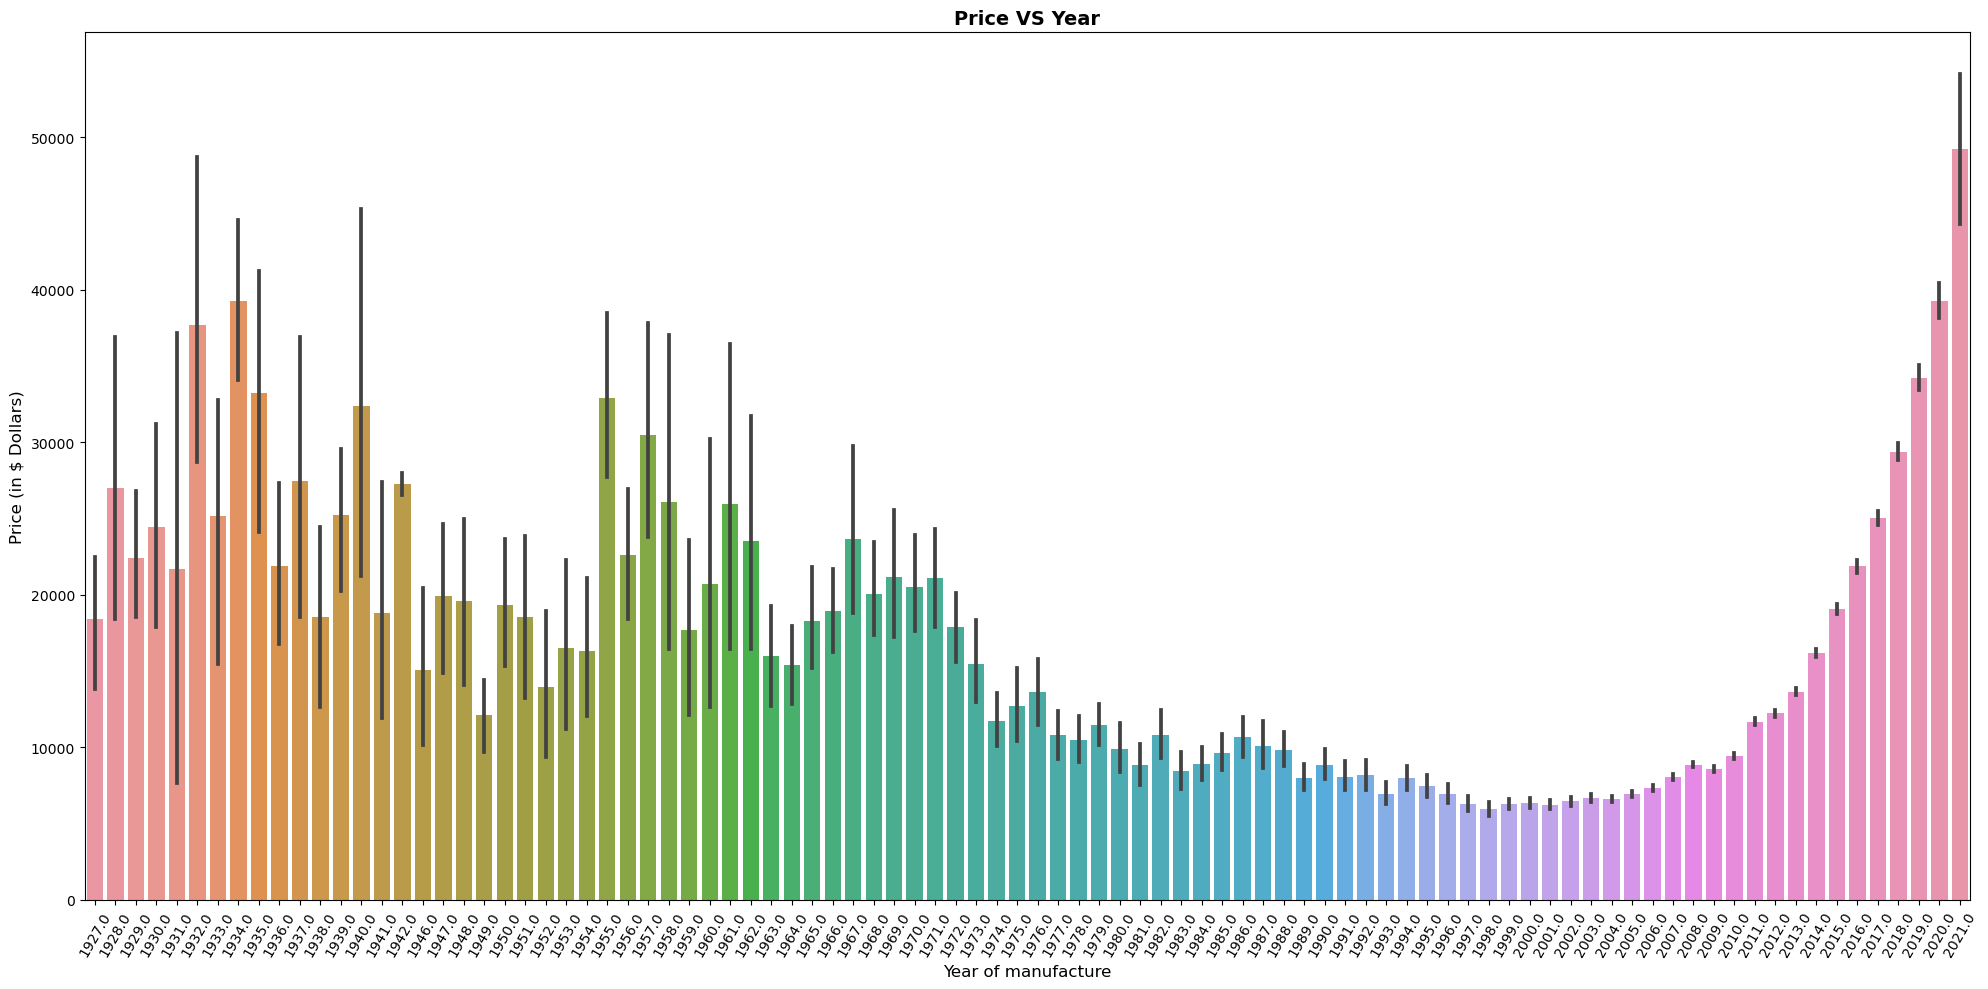

In [34]:
sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=df, y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

* We can see the price of the cars has steady increase after 1998. But before 1998, the price is fluctuating along the years.
* This is due to the demand of old cars as they are classic rather than in the utility sense.
* We can go in-depth to this detail.

#### Past 1998

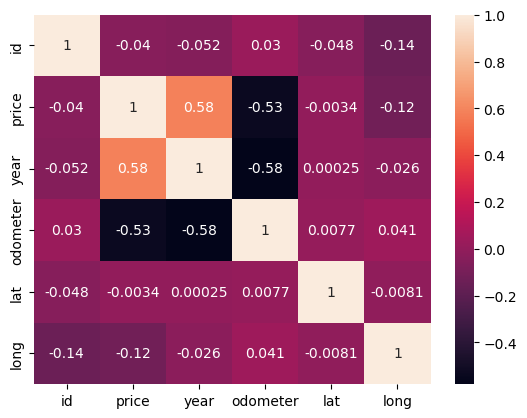

In [35]:
sns.heatmap(df[df["year"] >= 1998].corr(), annot=True)
plt.show()

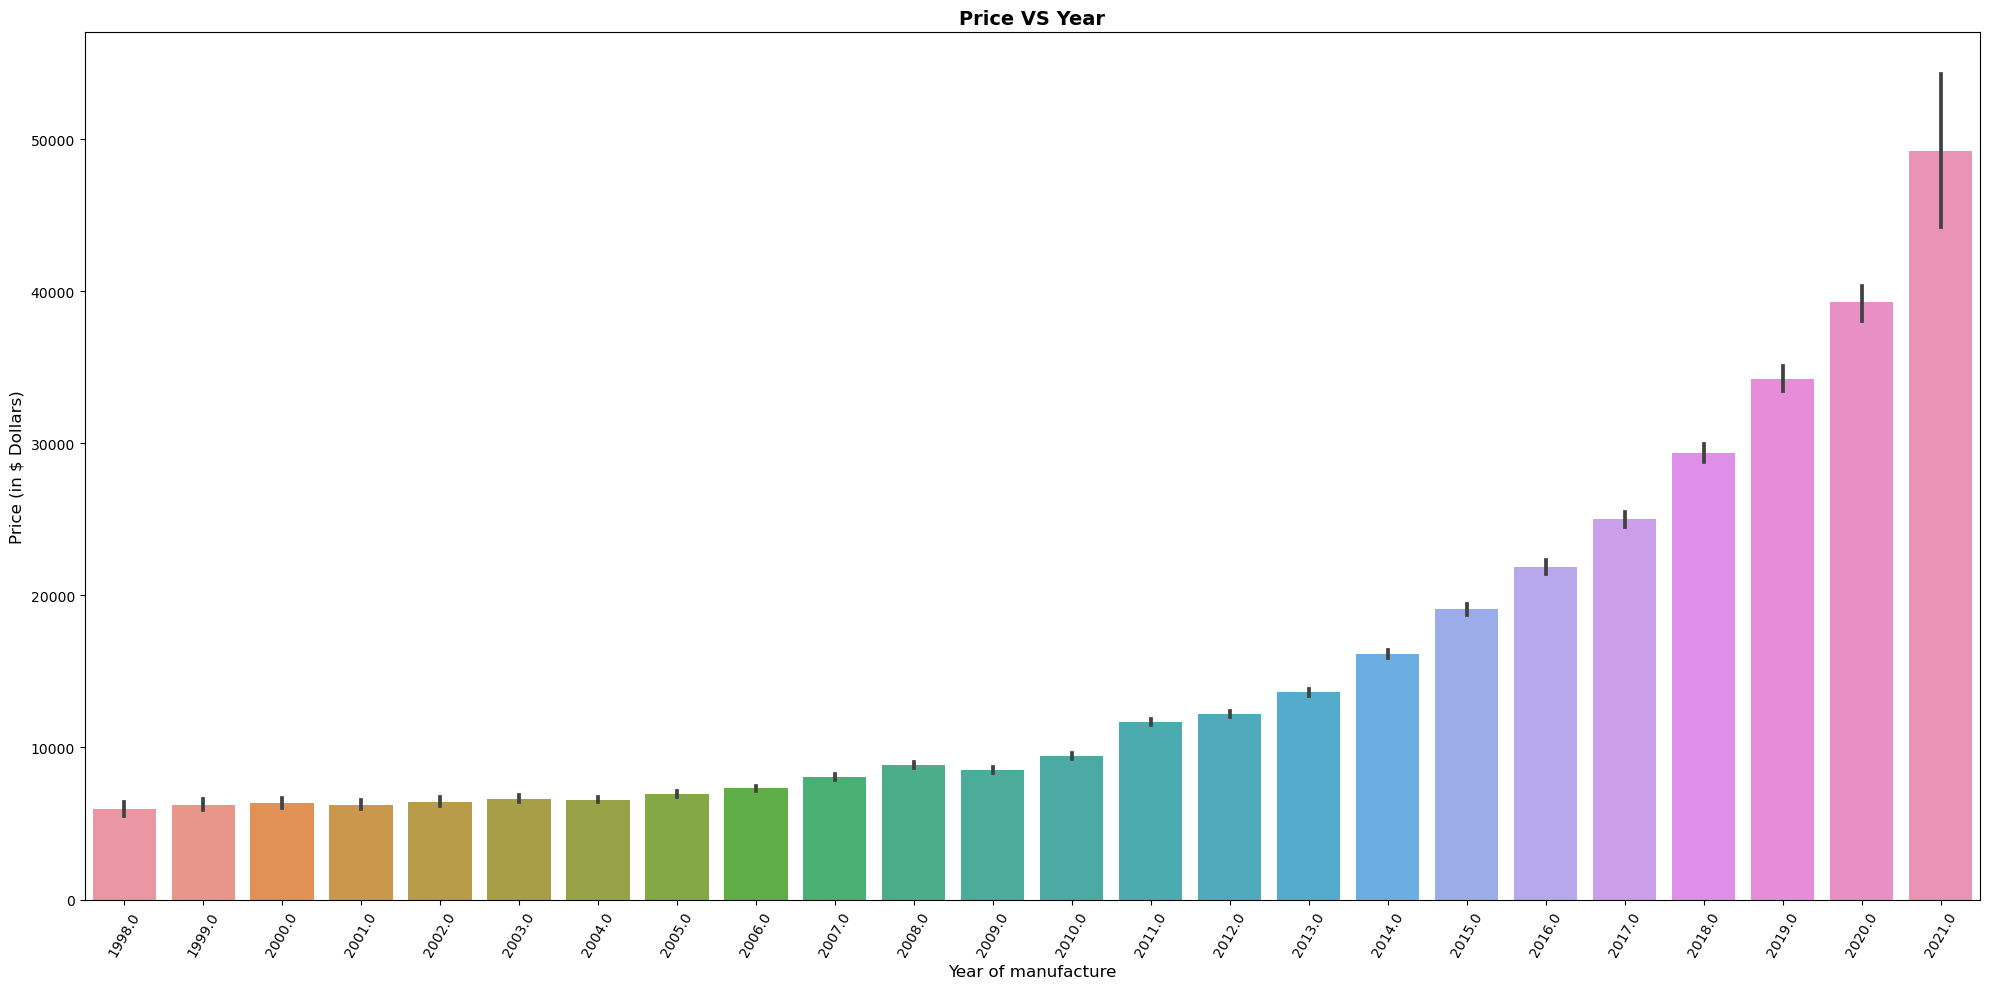

In [36]:
sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=df[df["year"] >= 1998], y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

* This is the clear depiction of the new cars having more market value.
* The correlation value between price and year is positive much higher than the previous scenario with whole data.

#### Before 1998

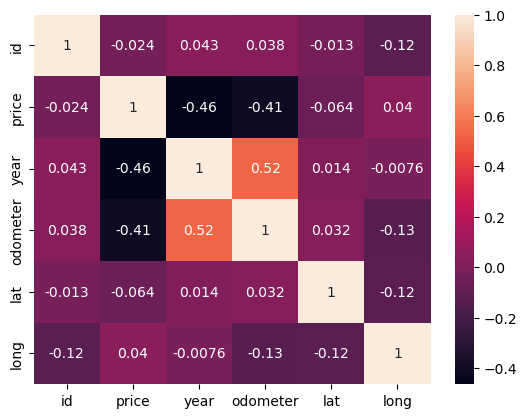

In [37]:
sns.heatmap(df[df["year"] < 1998].corr(), annot=True)
plt.show()

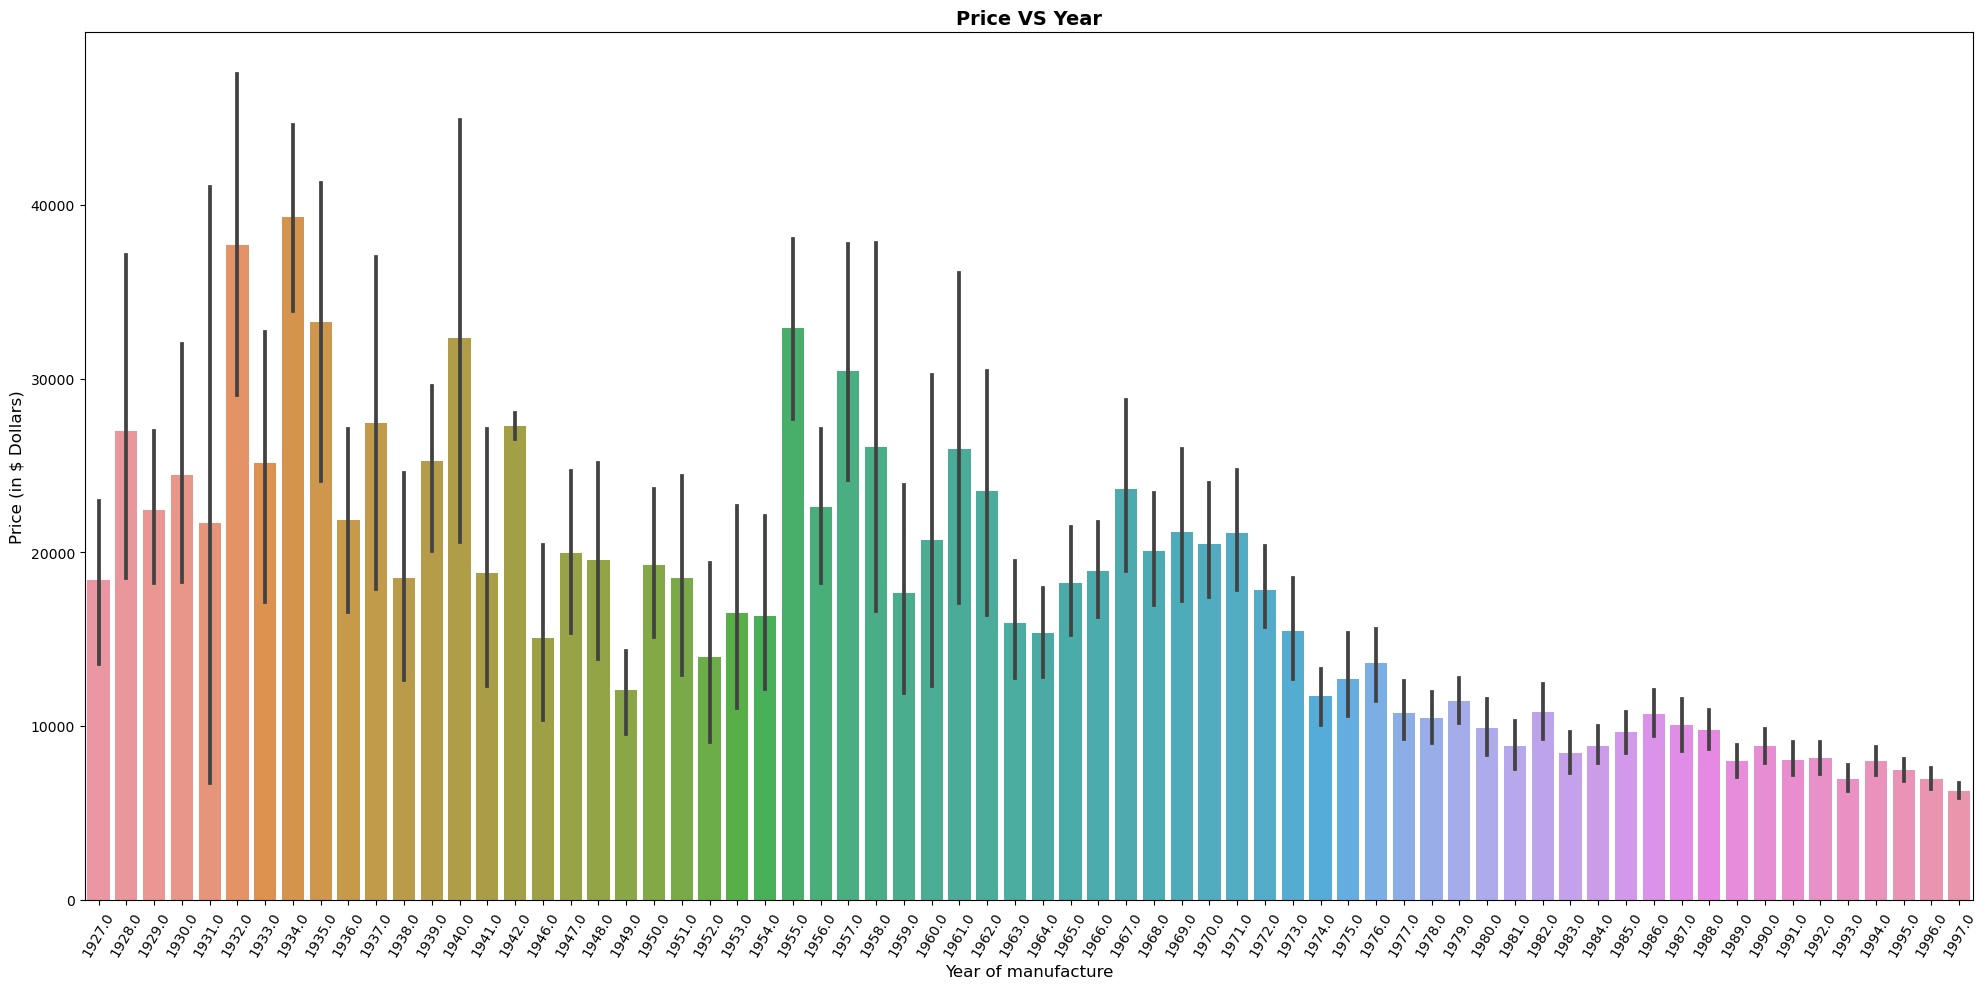

In [38]:
sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=df[df["year"] < 1998], y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

* Here, the case is reversed. The correlation between year and price is negative. That means, older cars have higher market value.

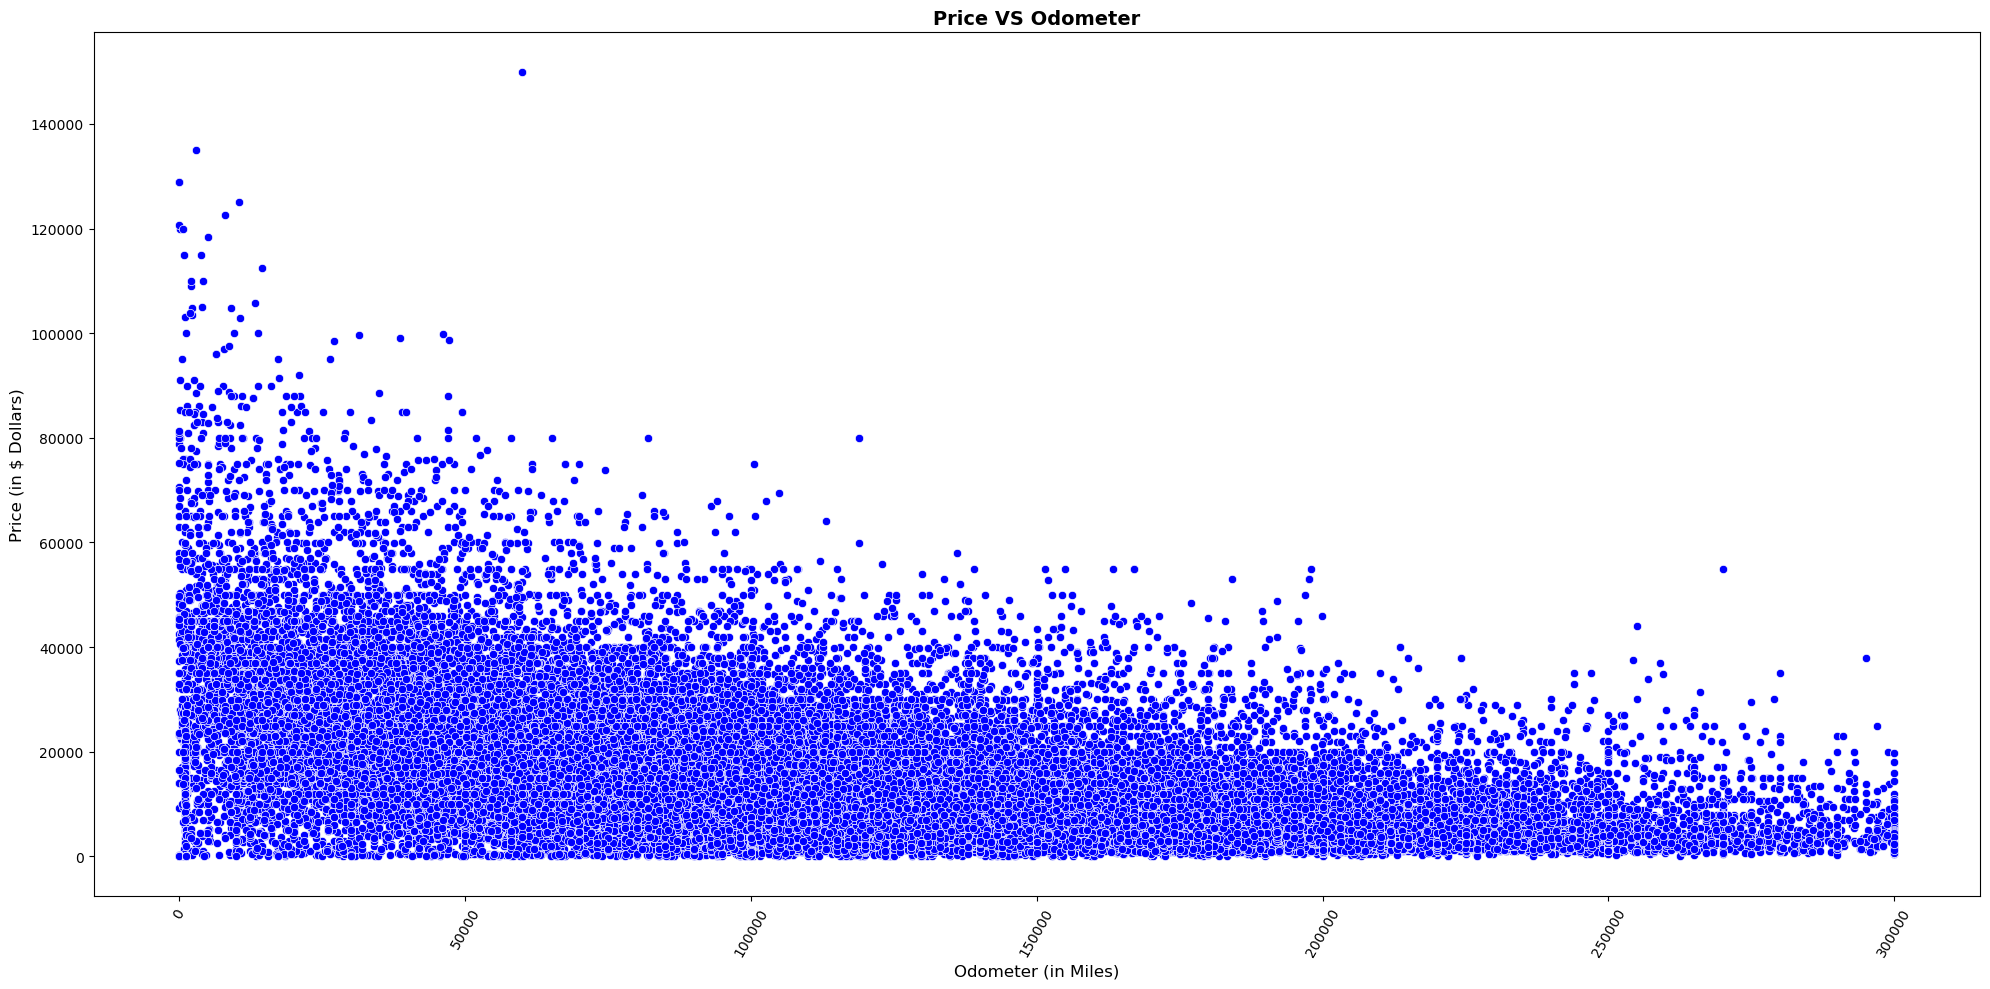

In [39]:
plt.figure(figsize =(20,10))
sns.scatterplot(data=df, y='price',x='odometer', color="blue")
plt.title("Price VS Odometer",fontsize=14,fontweight ='bold')
plt.xlabel('Odometer (in Miles)',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

* The negative correlation between the odometer and the price is depicted here. The higher the mileage, the higher the price.

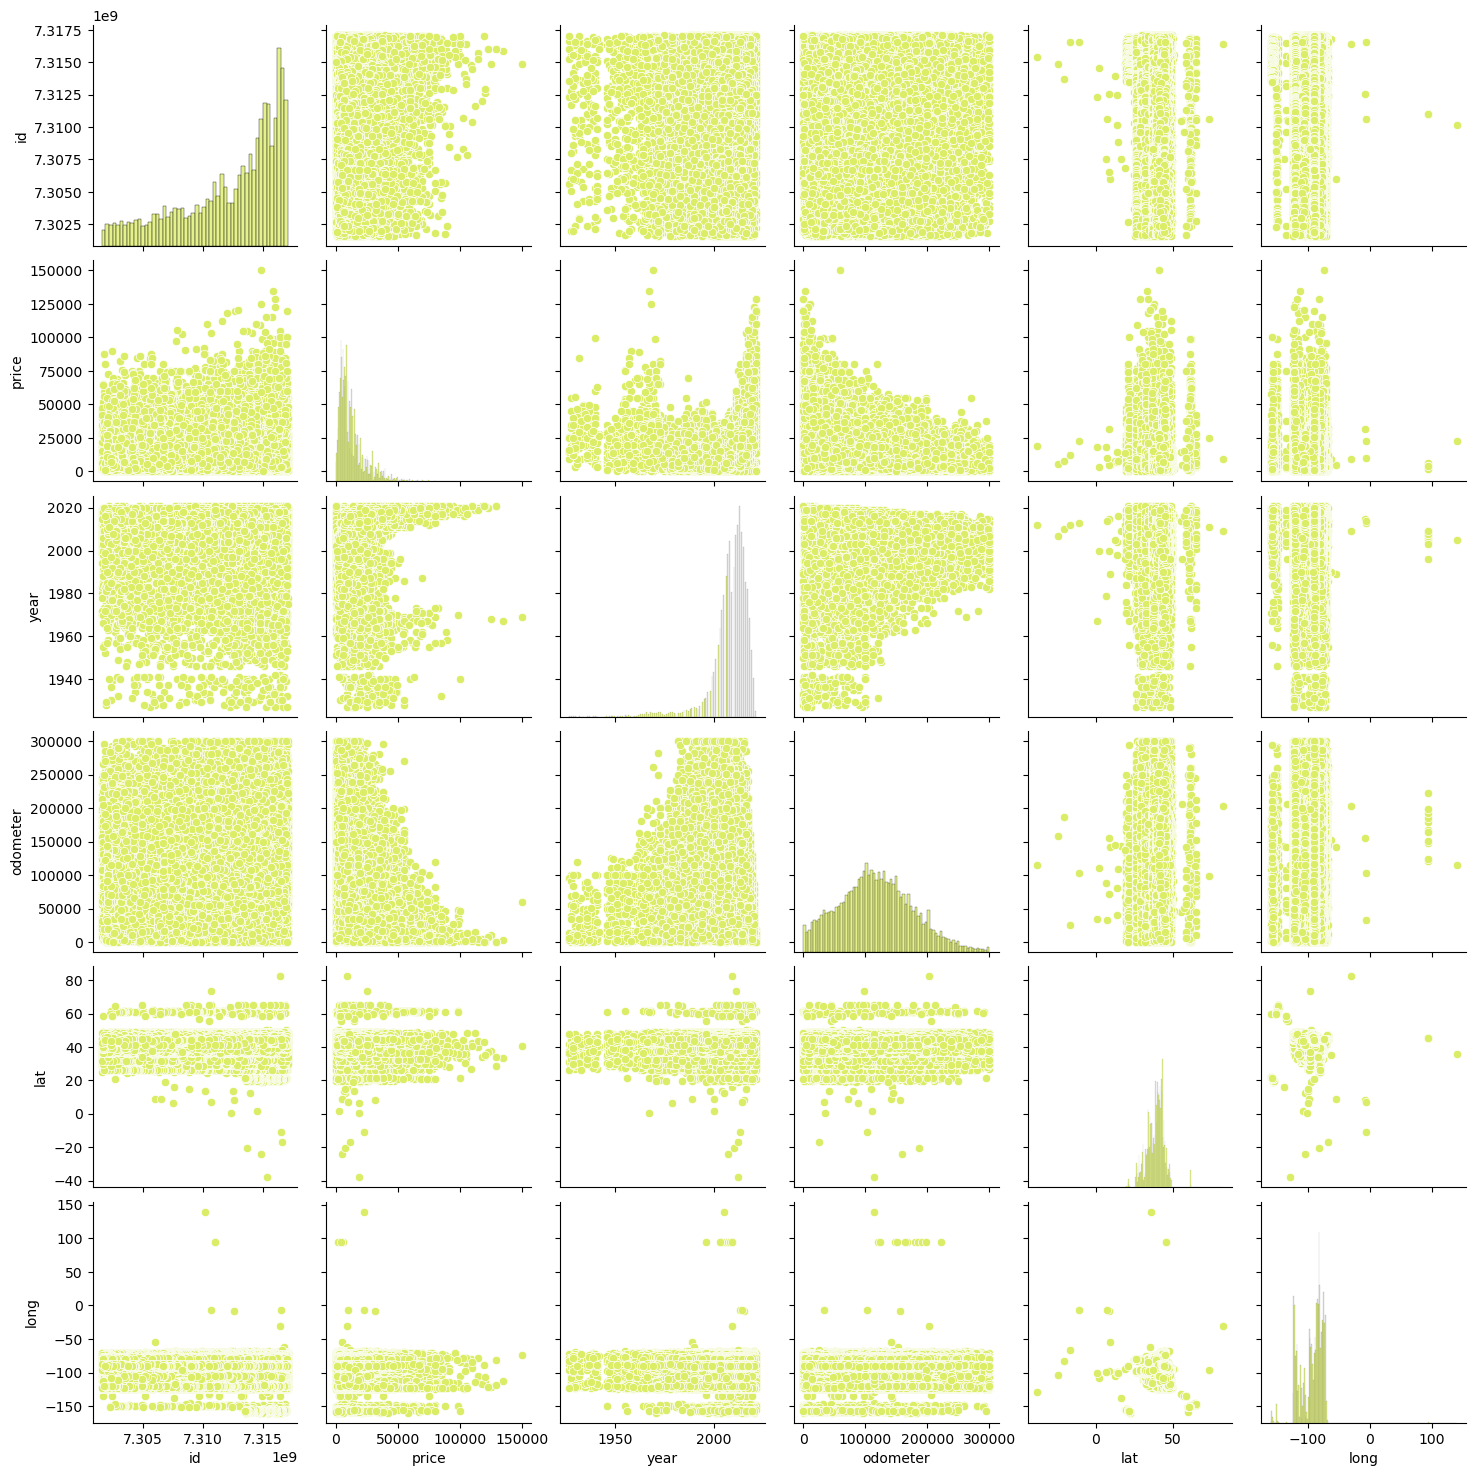

In [40]:
sns.pairplot(data=df)
plt.show()

#### Feature analysis for categorical features

* We only take categorical features with less than 6 groups for analysis.

In [60]:
cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype == 'object']
cat

['condition', 'cylinders', 'fuel', 'transmission', 'drive']

* Since there is data imbalance in the categorical columns, let us use the weighted average method to reduce bias.

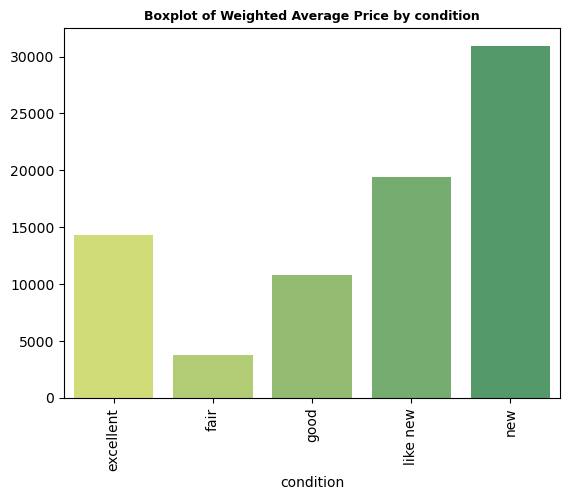

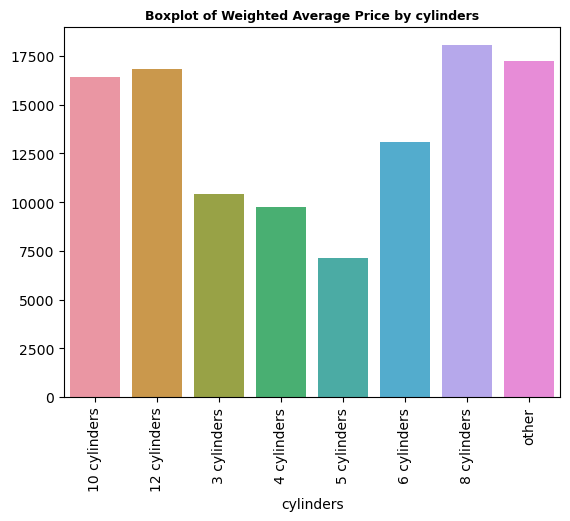

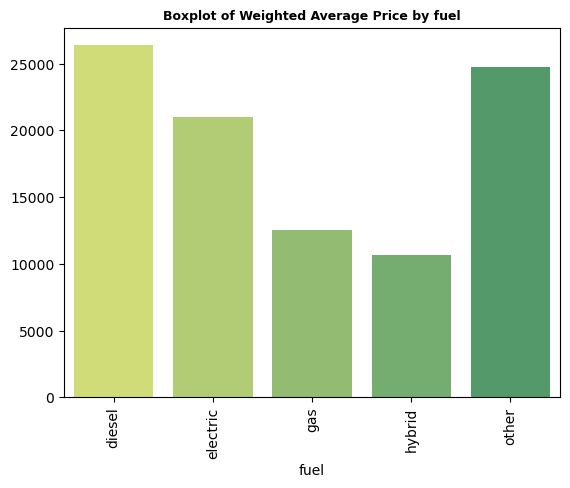

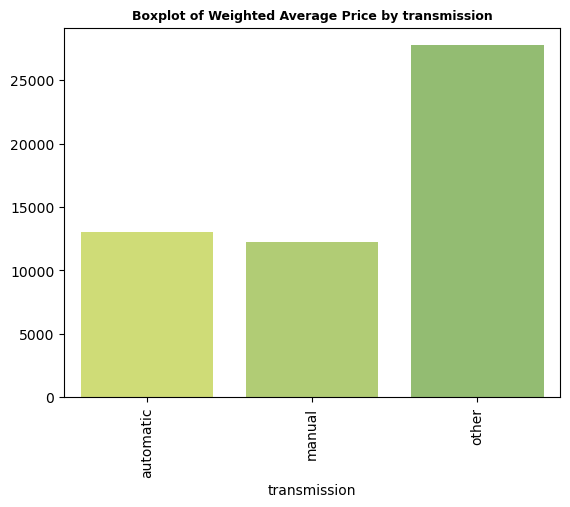

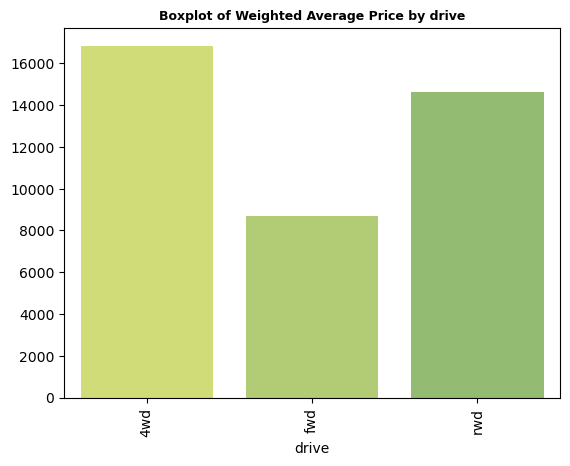

<Figure size 640x480 with 0 Axes>

In [59]:
for col in cat:
    # Calculate weighted averages
    weighted_avg = df.groupby(col)['price'].mean()

    # Bar Plot with Weighted Averages
    sns.barplot(x=weighted_avg.index, y=weighted_avg.values, ci=None)
    plt.title(f"Boxplot of Weighted Average Price by {col}", fontdict = {"fontsize": 9, "fontweight": "bold"})
    plt.xticks(rotation=90)
    plt.show()
    
# Adjust layout
plt.tight_layout()
plt.show()

* As expected, the car's with condition new and excellent have more price.
* In the case of cylinders used, the more the number of cylinders, the more the price.
* Regarding the fuel type, diesel cars has higher market value. Electric cars stands second in the price.
* The automatic and manual cars has almost similar price values even though automatic has an upper hand.
* Comparing the type of drive axle in the vehicle, four-wheel drive(4wd) has the highest price ranges and front-wheel drive(fwd) has the least price ranges.